In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

EDA 

In [2]:
df=pd.read_csv('/content/counselchat-data.csv')

In [3]:
df.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0


Let's take overview about Data 


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.shape

(1482, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     1482 non-null   object
 1   questionTitle  1480 non-null   object
 2   questionText   1383 non-null   object
 3   questionUrl    1482 non-null   object
 4   topics         1472 non-null   object
 5   therapistName  1482 non-null   object
 6   therapistUrl   1482 non-null   object
 7   answerText     1482 non-null   object
 8   upvotes        1482 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 104.3+ KB


In [6]:
df.columns

Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes'],
      dtype='object')

In [7]:
df.drop(['upvotes'],axis=1,inplace=True)
        

In [8]:
df.isnull().sum()

questionID        0
questionTitle     2
questionText     99
questionUrl       0
topics           10
therapistName     0
therapistUrl      0
answerText        0
dtype: int64

Visualization Missing Values

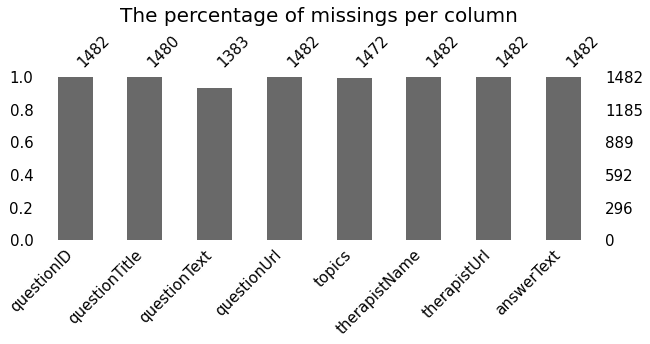

In [9]:
import missingno as msno
msno.bar(df, figsize=(10,3), fontsize=15)
plt.title("The percentage of missings per column", y=1.3, fontsize=20)
plt.show()

fill null values

In [10]:
df["questionTitle"] = df["questionTitle"].fillna(' ')
df["questionText"] = df["questionText"].fillna(' ')
df["topics"] = df["topics"].fillna(' ')

     


In [11]:
df.answerText

0       <p>What you are describing is something psycho...
1       <p>Hi. Good for you in planning ahead to do wh...
2       <p>It sounds like keeping the secrets has beco...
3       <p>Hi there. It's great you are able to realiz...
4       <p>You didn't say what or how many medications...
                              ...                        
1477    <p>Absolutely not!&nbsp;</p><p>It is never in ...
1478    <p>I'm sorry you have tension between you and ...
1479    <p>The true answer is, "no one can really say ...
1480    <p>How do you help yourself to believe you req...
1481                      <p>hmm this is a tough one!</p>
Name: answerText, Length: 1482, dtype: object

Remove links

The first operation is to remove all the links since they don’t have any predicting significance:

In [12]:
df["clean_text"] = df["answerText"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[["answerText","clean_text"]]


,answerText,clean_text
0,<p>What you are describing is something psycho...,<p>What you are describing is something psycho...
1,<p>Hi. Good for you in planning ahead to do wh...,<p>Hi. Good for you in planning ahead to do wh...
2,<p>It sounds like keeping the secrets has beco...,<p>It sounds like keeping the secrets has beco...
3,<p>Hi there. It's great you are able to realiz...,<p>Hi there. It's great you are able to realiz...
4,<p>You didn't say what or how many medications...,<p>You didn't say what or how many medications...
...,...,...
1477,<p>Absolutely not!&nbsp;</p><p>It is never in ...,<p>Absolutely not!&nbsp;</p><p>It is never in ...
1478,<p>I'm sorry you have tension between you and ...,<p>I'm sorry you have tension between you and ...
1479,"<p>The true answer is, ""no one can really say ...","<p>The true answer is, ""no one can really say ..."
1480,<p>How do you help yourself to believe you req...,<p>How do you help yourself to believe you req...


Remove punctuations

In [ ]:
df["clean_text"] = df["clean_text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='..."@#_]", " ", s).split()))
df[['answerText','clean_text']]

SyntaxError: ignored

Remove numbers

In [13]:
df["clean_text"].replace('d+', '', regex=True, inplace=True)
df[["answerText","clean_text"]]

,answerText,clean_text
0,<p>What you are describing is something psycho...,<p>What you are escribing is something psychol...
1,<p>Hi. Good for you in planning ahead to do wh...,<p>Hi. Goo for you in planning ahea to o what'...
2,<p>It sounds like keeping the secrets has beco...,<p>It souns like keeping the secrets has becom...
3,<p>Hi there. It's great you are able to realiz...,<p>Hi there. It's great you are able to realiz...
4,<p>You didn't say what or how many medications...,<p>You in't say what or how many meications yo...
...,...,...
1477,<p>Absolutely not!&nbsp;</p><p>It is never in ...,<p>Absolutely not!&nbsp;</p><p>It is never in ...
1478,<p>I'm sorry you have tension between you and ...,<p>I'm sorry you have tension between you an y...
1479,"<p>The true answer is, ""no one can really say ...","<p>The true answer is, ""no one can really say ..."
1480,<p>How do you help yourself to believe you req...,<p>How o you help yourself to believe you requ...


Remove emojis

In [14]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_text"] = df["clean_text"].apply(lambda s: deEmojify(s))
df[['answerText','clean_text']]

,answerText,clean_text
0,<p>What you are describing is something psycho...,<p>What you are escribing is something psychol...
1,<p>Hi. Good for you in planning ahead to do wh...,<p>Hi. Goo for you in planning ahea to o what'...
2,<p>It sounds like keeping the secrets has beco...,<p>It souns like keeping the secrets has becom...
3,<p>Hi there. It's great you are able to realiz...,<p>Hi there. It's great you are able to realiz...
4,<p>You didn't say what or how many medications...,<p>You in't say what or how many meications yo...
...,...,...
1477,<p>Absolutely not!&nbsp;</p><p>It is never in ...,<p>Absolutely not!&nbsp;</p><p>It is never in ...
1478,<p>I'm sorry you have tension between you and ...,<p>I'm sorry you have tension between you an y...
1479,"<p>The true answer is, ""no one can really say ...","<p>The true answer is, ""no one can really say ..."
1480,<p>How do you help yourself to believe you req...,<p>How o you help yourself to believe you requ...


Remove stop words

In [15]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop = set(stopwords.words('english'))
print(stop)

{"didn't", 'while', "isn't", 'her', 'we', 'to', 'my', 'against', 'yourselves', 'on', 'there', "doesn't", 'as', "don't", 'wasn', 'from', 'your', 'off', "you're", "that'll", 'so', 'each', 'doesn', 'too', 'the', 'all', 'no', 'these', 'hadn', 'himself', 'then', 'he', 'which', "aren't", 'with', 'own', 'did', 'after', "shan't", 'for', 'their', "you've", 'theirs', 'doing', 'aren', "shouldn't", "wasn't", 'herself', "won't", "it's", "should've", 't', 'me', 'won', 'but', 'than', 'more', 'will', "haven't", 'have', 'yours', 'and', "you'd", 'y', 'myself', 'was', 'whom', 'that', 'when', 's', 'isn', "needn't", "mustn't", 'you', 'between', 'once', 'themselves', 'am', 'ma', 'through', 'our', 'above', 'ours', 'who', 'itself', 'be', 'needn', 'has', 'about', 'what', 'they', 'only', 'a', "hadn't", 'into', 'here', 'why', 'before', 'under', 'been', 'because', 'same', 'mustn', 'few', "mightn't", 'him', 'over', 'being', 'mightn', 'ain', 'shouldn', 've', 'an', 'in', 'should', 'up', 'ourselves', 'is', 'further',

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stop = set(stopwords.words('english'))
print(stop)

{"didn't", 'while', "isn't", 'her', 'we', 'to', 'my', 'against', 'yourselves', 'on', 'there', "doesn't", 'as', "don't", 'wasn', 'from', 'your', 'off', "you're", "that'll", 'so', 'each', 'doesn', 'too', 'the', 'all', 'no', 'these', 'hadn', 'himself', 'then', 'he', 'which', "aren't", 'with', 'own', 'did', 'after', "shan't", 'for', 'their', "you've", 'theirs', 'doing', 'aren', "shouldn't", "wasn't", 'herself', "won't", "it's", "should've", 't', 'me', 'won', 'but', 'than', 'more', 'will', "haven't", 'have', 'yours', 'and', "you'd", 'y', 'myself', 'was', 'whom', 'that', 'when', 's', 'isn', "needn't", "mustn't", 'you', 'between', 'once', 'themselves', 'am', 'ma', 'through', 'our', 'above', 'ours', 'who', 'itself', 'be', 'needn', 'has', 'about', 'what', 'they', 'only', 'a', "hadn't", 'into', 'here', 'why', 'before', 'under', 'been', 'because', 'same', 'mustn', 'few', "mightn't", 'him', 'over', 'being', 'mightn', 'ain', 'shouldn', 've', 'an', 'in', 'should', 'up', 'ourselves', 'is', 'further',

In [17]:
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text
df["clean_text"] = df["clean_text"].apply(lambda s: rem_en(s))
df[["answerText","clean_text"]]

,answerText,clean_text
0,<p>What you are describing is something psycho...,<p>what escribing something psychologists term...
1,<p>Hi. Good for you in planning ahead to do wh...,<p>hi. goo planning ahea what's healthiest bab...
2,<p>It sounds like keeping the secrets has beco...,<p>it souns like keeping secrets become proble...
3,<p>Hi there. It's great you are able to realiz...,<p>hi there. great able realize issues going s...
4,<p>You didn't say what or how many medications...,<p>you in't say many meications trie. certain ...
...,...,...
1477,<p>Absolutely not!&nbsp;</p><p>It is never in ...,<p>absolutely not!&nbsp;</p><p>it never chil's...
1478,<p>I'm sorry you have tension between you and ...,<p>i'm sorry tension bf.</p><p>a relationship ...
1479,"<p>The true answer is, ""no one can really say ...","<p>the true answer is, ""no one really say cert..."
1480,<p>How do you help yourself to believe you req...,<p>how help believe require offers you?</p><p>...


Tokenization 

We simply split the text into tokens. In other words, the string is converted into a list, where each element corresponds to a word. The module nltk provides tokenize function to tokenize the tweets.


In [18]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'w+')

df["clean_text"] = df["clean_text"].apply(lambda x: tokeniser.tokenize(x))
df[["answerText","clean_text"]]

,answerText,clean_text
0,<p>What you are describing is something psycho...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ..."
1,<p>Hi. Good for you in planning ahead to do wh...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ..."
2,<p>It sounds like keeping the secrets has beco...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ..."
3,<p>Hi there. It's great you are able to realiz...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w]"
4,<p>You didn't say what or how many medications...,"[w, w, w, w, w, w]"
...,...,...
1477,<p>Absolutely not!&nbsp;</p><p>It is never in ...,"[w, w, w, w]"
1478,<p>I'm sorry you have tension between you and ...,"[w, w, w, w, w, w, w]"
1479,"<p>The true answer is, ""no one can really say ...","[w, w, w, w, w]"
1480,<p>How do you help yourself to believe you req...,"[w, w, w, w]"


Normalize words

The last step consists in normalizing the text. What does it mean? We want to convert a word to its base form. For example, playing, plays and play can seem different to the computer, but they are the same thing. We need to produce the root forms of these words. The nltk module plays a relevant role this time too. It provides the WordNetLemmatizer function, which looks for the lemmas of the words using a database, called WordNet

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df["clean_text"] = df["clean_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df[["answerText","clean_text"]]

,answerText,clean_text
0,<p>What you are describing is something psycho...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ..."
1,<p>Hi. Good for you in planning ahead to do wh...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ..."
2,<p>It sounds like keeping the secrets has beco...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ..."
3,<p>Hi there. It's great you are able to realiz...,"[w, w, w, w, w, w, w, w, w, w, w, w, w, w]"
4,<p>You didn't say what or how many medications...,"[w, w, w, w, w, w]"
...,...,...
1477,<p>Absolutely not!&nbsp;</p><p>It is never in ...,"[w, w, w, w]"
1478,<p>I'm sorry you have tension between you and ...,"[w, w, w, w, w, w, w]"
1479,"<p>The true answer is, ""no one can really say ...","[w, w, w, w, w]"
1480,<p>How do you help yourself to believe you req...,"[w, w, w, w]"


Appling this proccessing in questionText

Renove Links

In [23]:
df["clean_question_text"] = df["questionText"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[['questionText','clean_question_text']]


,questionText,clean_question_text
0,My wife and mother are having tense disagreeme...,My wife and mother are having tense disagreeme...
1,"I'm planning to have baby, so I have to quit s...","I'm planning to have baby, so I have to quit s..."
2,"I have secrets in my mind, and I don't know wh...","I have secrets in my mind, and I don't know wh..."
3,I am extremely possessive in my relationships ...,I am extremely possessive in my relationships ...
4,I had a head injury a few years ago and my min...,I had a head injury a few years ago and my min...
...,...,...
1477,My grandson's step-mother sends him to school ...,My grandson's step-mother sends him to school ...
1478,My boyfriend is in recovery from drug addictio...,My boyfriend is in recovery from drug addictio...
1479,The birth mother attempted suicide several tim...,The birth mother attempted suicide several tim...
1480,I think adult life is making him depressed and...,I think adult life is making him depressed and...


Remove punctuation

In [24]:
df["clean_question_text"] = df["questionText"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='..."@#_]", " ", s).split()))
df[["questionText","clean_question_text"]]

SyntaxError: ignored

Remove numbers

In [25]:
df["clean_question_text"].replace('d+', '', regex=True, inplace=True)
df[["questionText","clean_question_text"]]

,questionText,clean_question_text
0,My wife and mother are having tense disagreeme...,My wife an mother are having tense isagreement...
1,"I'm planning to have baby, so I have to quit s...","I'm planning to have baby, so I have to quit s..."
2,"I have secrets in my mind, and I don't know wh...","I have secrets in my min, an I on't know what ..."
3,I am extremely possessive in my relationships ...,I am extremely possessive in my relationships ...
4,I had a head injury a few years ago and my min...,I ha a hea injury a few years ago an my min ra...
...,...,...
1477,My grandson's step-mother sends him to school ...,My granson's step-mother sens him to school wi...
1478,My boyfriend is in recovery from drug addictio...,My boyfrien is in recovery from rug aiction. W...
1479,The birth mother attempted suicide several tim...,The birth mother attempte suicie several times...
1480,I think adult life is making him depressed and...,I think ault life is making him epresse an we ...


Remove_Emojey

In [26]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_question_text"] = df["questionText"].apply(lambda s: deEmojify(s))
df[["questionText","clean_question_text"]]

,questionText,clean_question_text
0,My wife and mother are having tense disagreeme...,My wife and mother are having tense disagreeme...
1,"I'm planning to have baby, so I have to quit s...","I'm planning to have baby, so I have to quit s..."
2,"I have secrets in my mind, and I don't know wh...","I have secrets in my mind, and I don't know wh..."
3,I am extremely possessive in my relationships ...,I am extremely possessive in my relationships ...
4,I had a head injury a few years ago and my min...,I had a head injury a few years ago and my min...
...,...,...
1477,My grandson's step-mother sends him to school ...,My grandson's step-mother sends him to school ...
1478,My boyfriend is in recovery from drug addictio...,My boyfriend is in recovery from drug addictio...
1479,The birth mother attempted suicide several tim...,The birth mother attempted suicide several tim...
1480,I think adult life is making him depressed and...,I think adult life is making him depressed and...


Remove stop words

In [44]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = set(stopwords.words('english'))
print(stop)


{"didn't", 'while', "isn't", 'her', 'we', 'to', 'my', 'against', 'yourselves', 'on', 'there', "doesn't", 'as', "don't", 'wasn', 'from', 'your', 'off', "you're", "that'll", 'so', 'each', 'doesn', 'too', 'the', 'all', 'no', 'these', 'hadn', 'himself', 'then', 'he', 'which', "aren't", 'with', 'own', 'did', 'after', "shan't", 'for', 'their', "you've", 'theirs', 'doing', 'aren', "shouldn't", "wasn't", 'herself', "won't", "it's", "should've", 't', 'me', 'won', 'but', 'than', 'more', 'will', "haven't", 'have', 'yours', 'and', "you'd", 'y', 'myself', 'was', 'whom', 'that', 'when', 's', 'isn', "needn't", "mustn't", 'you', 'between', 'once', 'themselves', 'am', 'ma', 'through', 'our', 'above', 'ours', 'who', 'itself', 'be', 'needn', 'has', 'about', 'what', 'they', 'only', 'a', "hadn't", 'into', 'here', 'why', 'before', 'under', 'been', 'because', 'same', 'mustn', 'few', "mightn't", 'him', 'over', 'being', 'mightn', 'ain', 'shouldn', 've', 'an', 'in', 'should', 'up', 'ourselves', 'is', 'further',

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenization



In [28]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'w+')
df["clean_question_text"] = df["clean_question_text"].apply(lambda x: tokeniser.tokenize(x))
df[["questionText","clean_question_text"]]

,questionText,clean_question_text
0,My wife and mother are having tense disagreeme...,"[w, w, w, w, w, w, w, w]"
1,"I'm planning to have baby, so I have to quit s...",[]
2,"I have secrets in my mind, and I don't know wh...","[w, w, w, w, w, w, w]"
3,I am extremely possessive in my relationships ...,[w]
4,I had a head injury a few years ago and my min...,"[w, w, w, w]"
...,...,...
1477,My grandson's step-mother sends him to school ...,[w]
1478,My boyfriend is in recovery from drug addictio...,"[w, w]"
1479,The birth mother attempted suicide several tim...,"[w, w, w, w, w, w, w]"
1480,I think adult life is making him depressed and...,"[w, w, w, w, w, w]"


Normalize words

In [29]:
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df["clean_question_text"] = df["clean_question_text"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df[["questionText","clean_question_text"]]

,questionText,clean_question_text
0,My wife and mother are having tense disagreeme...,"[w, w, w, w, w, w, w, w]"
1,"I'm planning to have baby, so I have to quit s...",[]
2,"I have secrets in my mind, and I don't know wh...","[w, w, w, w, w, w, w]"
3,I am extremely possessive in my relationships ...,[w]
4,I had a head injury a few years ago and my min...,"[w, w, w, w]"
...,...,...
1477,My grandson's step-mother sends him to school ...,[w]
1478,My boyfriend is in recovery from drug addictio...,"[w, w]"
1479,The birth mother attempted suicide several tim...,"[w, w, w, w, w, w, w]"
1480,I think adult life is making him depressed and...,"[w, w, w, w, w, w]"
